In [22]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Read processed datasets, this processed dataset
df_train= df = pd.read_csv('/content/drive/My Drive/train_data.csv')
df_test = pd.read_csv('/content/drive/My Drive/test_data.csv')
df_val = pd.read_csv('/content/drive/My Drive/val_data.csv')
print(df_train.shape, df_test.shape, df_val.shape)

(13814, 33) (2961, 33) (2960, 33)


In [24]:
# Converting season to binary number
season_mapping = {'Winter': 1.0, 'Spring': 0.0}
df_train['season'] = df_train['season'].map(season_mapping)
df_test['season'] = df_test['season'].map(season_mapping)
df_val['season'] = df_val['season'].map(season_mapping)

In [25]:
df_train.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'season', 'RH_out_log', 'Appliances_sq',
       'RH_out_sq', 'Appliances_log'],
      dtype='object')

In [26]:
# Set predictors and outcome variable
predictors = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'season']

X_train = df_train[predictors]
X_test = df_test[predictors]
X_val = df_val[predictors]

y_train = df_train['Appliances_log']
y_test = df_test['Appliances_log']
y_val = df_val['Appliances_log']

# Decision Trees

In [27]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [28]:
# Fit Decision Trees
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

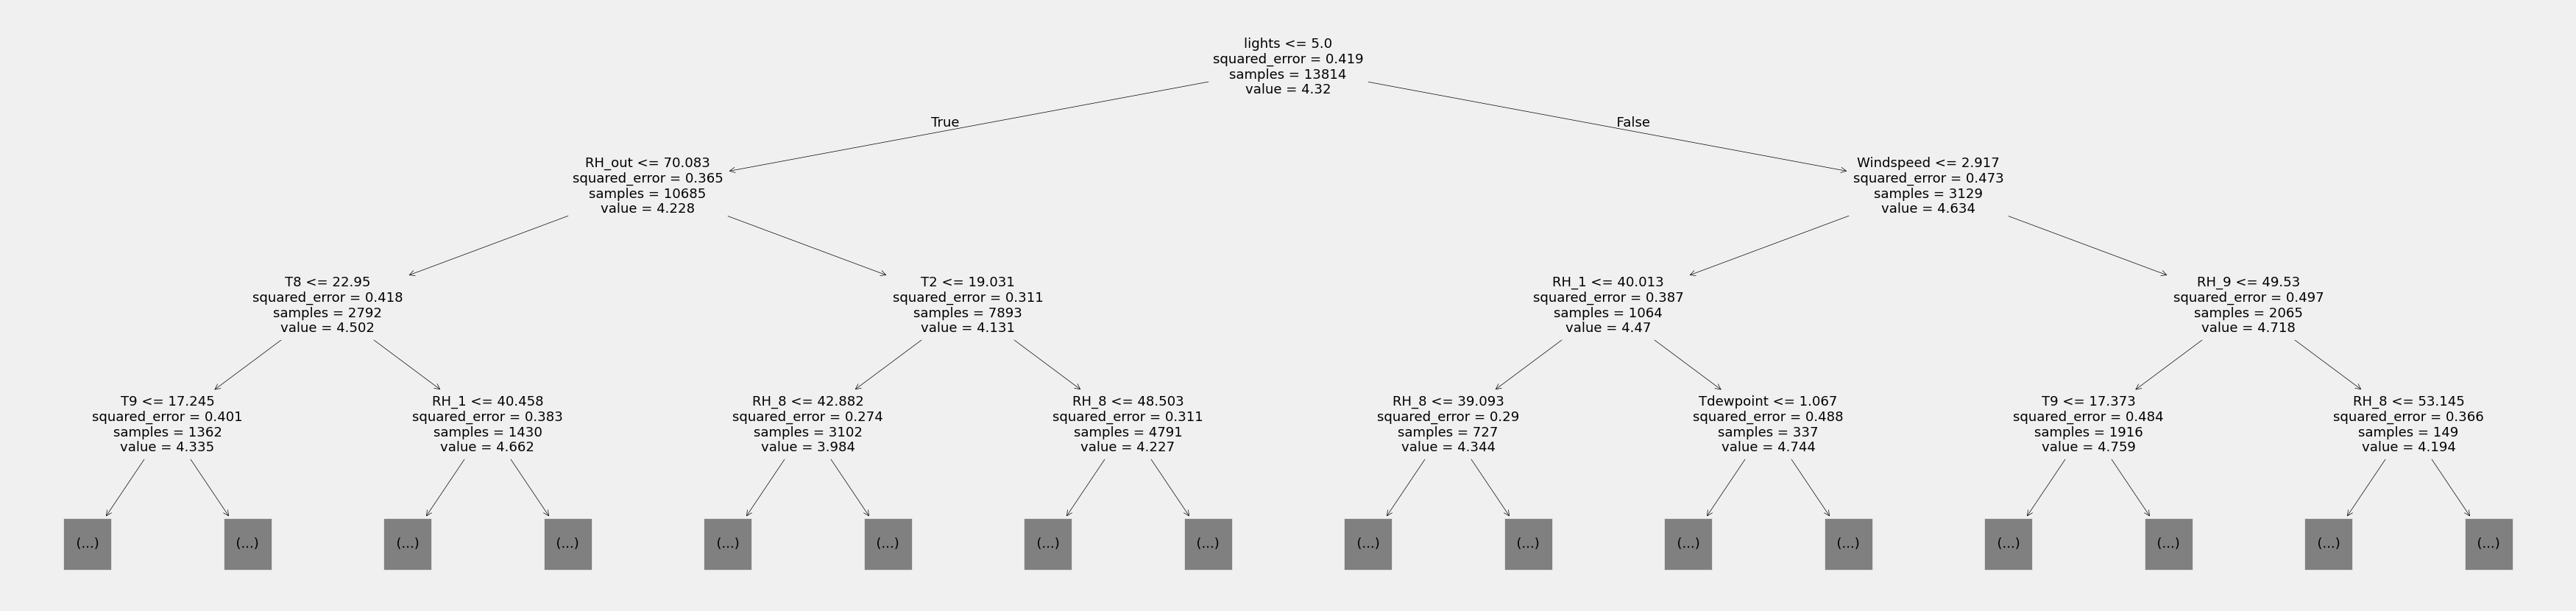

In [29]:
# Plot Decision Tree
fig = plt.figure(figsize=(40,10))
tree.plot_tree(dt, feature_names=predictors, max_depth=3, filled=False);

In [30]:
# Make predictions on the train data
y_hat_train = dt.predict(X_train)
mse_train = mean_squared_error(y_train, y_hat_train)
r2_train = r2_score(y_train, y_hat_train)

print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R2): {r2_train}")

Mean Squared Error (MSE): 2.4227178155495458e-32
R-squared (R2): 1.0


In [31]:
# Make predictions on the test data
y_hat_test= dt.predict(X_test)
mse_test = mean_squared_error(y_test, y_hat_test)
r2_test = r2_score(y_test, y_hat_test)

print(f"Mean Squared Error (MSE) on test data: {mse_test}")
print(f"R-squared (R2) on test data: {r2_test}")

Mean Squared Error (MSE) on test data: 0.26518300573762843
R-squared (R2) on test data: 0.41509076115037713


In [32]:
# Make predictions on the val data
y_hat_val= dt.predict(X_val)
mse_val = mean_squared_error(y_val, y_hat_val)
r2_val = r2_score(y_val, y_hat_val)

print(f"Mean Squared Error (MSE) on val data: {mse_val}")
print(f"R-squared (R2) on val data: {r2_val}")

Mean Squared Error (MSE) on val data: 0.25319820877048843
R-squared (R2) on val data: 0.3643514449148959


In [33]:
# Decision Tree feature importance
dt.feature_importances_

# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
predictor_importances = [(predictor, round(importance, 2)) for predictor, importance in zip(predictors, importances)]

# Sort the feature importances by most important first
predictor_importances = sorted(predictor_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in predictor_importances] ;

Variable: RH_out               Importance: 0.08
Variable: lights               Importance: 0.07
Variable: RH_8                 Importance: 0.07
Variable: RH_1                 Importance: 0.06
Variable: Press_mm_hg          Importance: 0.05
Variable: T2                   Importance: 0.04
Variable: RH_2                 Importance: 0.04
Variable: T3                   Importance: 0.04
Variable: RH_3                 Importance: 0.04
Variable: RH_5                 Importance: 0.04
Variable: RH_7                 Importance: 0.04
Variable: T8                   Importance: 0.04
Variable: RH_9                 Importance: 0.04
Variable: T4                   Importance: 0.03
Variable: RH_4                 Importance: 0.03
Variable: T5                   Importance: 0.03
Variable: T6                   Importance: 0.03
Variable: RH_6                 Importance: 0.03
Variable: T9                   Importance: 0.03
Variable: T_out                Importance: 0.03
Variable: Windspeed            Importanc

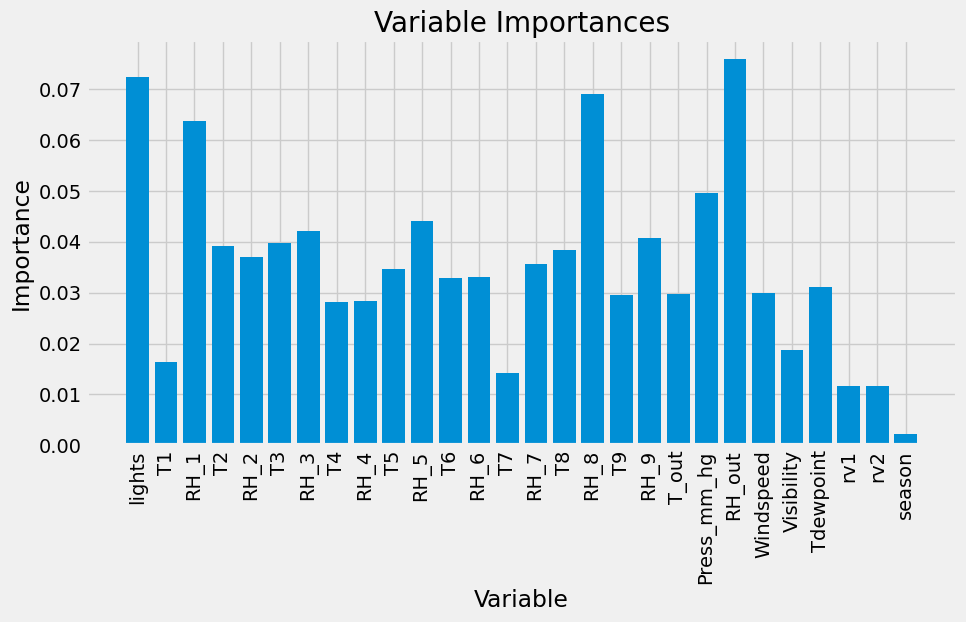

In [34]:
# Create feature importances plot
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(10, 5))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

In [ ]:
# Fitting different alphas for decision trees
alphas = [10, 1, 0.5,  0.1, 0.001, 0.0001, 0.00001, 0]
ctr=1
for a in alphas:
  dt = DecisionTreeRegressor(ccp_alpha=a)
  dt.fit(X_train, y_train)
  y_pred=dt.predict(X_test)
  ctr+=1
  mse = mean_squared_error(y_test, y_pred)
  print(mse)
  r2 = r2_score(y_test, y_pred)
  print(r2)

0.4538367510539425
-0.0010193069596104998
0.4538367510539425
-0.0010193069596104998
0.4538367510539425
-0.0010193069596104998
0.4538367510539425
-0.0010193069596104998
0.3259471129471097
0.28106449653959276
0.2746224698529357
0.3942703101736077
0.26597328498075123
0.41334765687682906
0.2814000392912369
0.379321150930238


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Fit random forest
rf = RandomForestRegressor(max_features="sqrt", n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [ ]:
# Make predictions on the train data
y_train_hat_rf = rf.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_train_hat_rf)
r2_train_rf = r2_score(y_train, y_train_hat_rf)

# Make predictions on the test data
y_test_hat_rf = rf.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_hat_rf)
r2_test_rf = r2_score(y_test, y_test_hat_rf)

# Make predictions on the validation data
y_val_hat_rf = rf.predict(X_val)
mse_val_rf = mean_squared_error(y_val, y_val_hat_rf)
r2_val_rf = r2_score(y_val, y_val_hat_rf)

print(mse_train_rf, r2_train_rf)
print(mse_test_rf, r2_test_rf)
print(mse_val_rf, r2_val_rf)

0.29798210596905195 0.28800548016876293
0.3363192162276353 0.2581869406486835
0.28901919980379775 0.27442363182882856


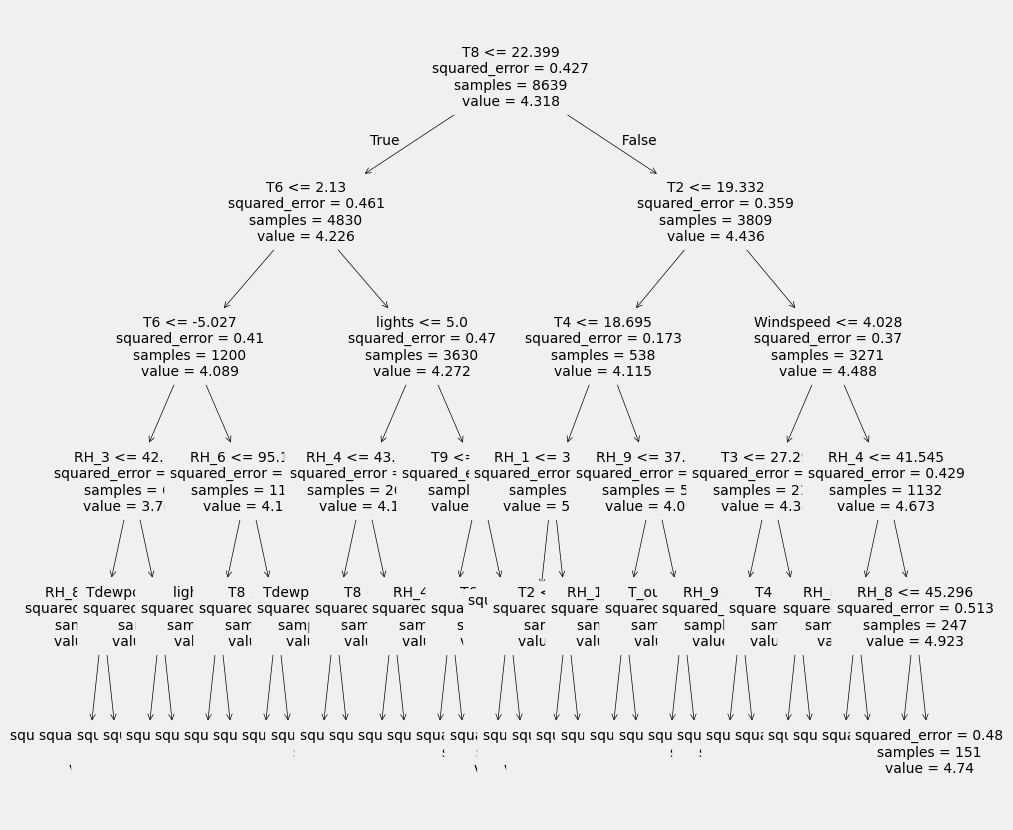

In [ ]:
# Creat random Forest plot
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(rf.estimators_[0], feature_names=predictors, fontsize=10)
plt.show()

In [ ]:
# Random Forest feature importance
rf.feature_importances_

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
predictor_importances = [(predictor, round(importance, 2)) for predictor, importance in zip(predictors, importances)]

# Sort the feature importances by most important first
predictor_importances = sorted(predictor_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in predictor_importances] ;

Variable: lights               Importance: 0.2
Variable: RH_out               Importance: 0.1
Variable: T2                   Importance: 0.09
Variable: RH_8                 Importance: 0.06
Variable: RH_6                 Importance: 0.05
Variable: T8                   Importance: 0.05
Variable: RH_1                 Importance: 0.04
Variable: T3                   Importance: 0.04
Variable: RH_9                 Importance: 0.04
Variable: RH_3                 Importance: 0.03
Variable: T6                   Importance: 0.03
Variable: T9                   Importance: 0.03
Variable: T1                   Importance: 0.02
Variable: RH_2                 Importance: 0.02
Variable: T4                   Importance: 0.02
Variable: RH_4                 Importance: 0.02
Variable: T5                   Importance: 0.02
Variable: RH_5                 Importance: 0.02
Variable: T7                   Importance: 0.02
Variable: RH_7                 Importance: 0.02
Variable: T_out                Importance:

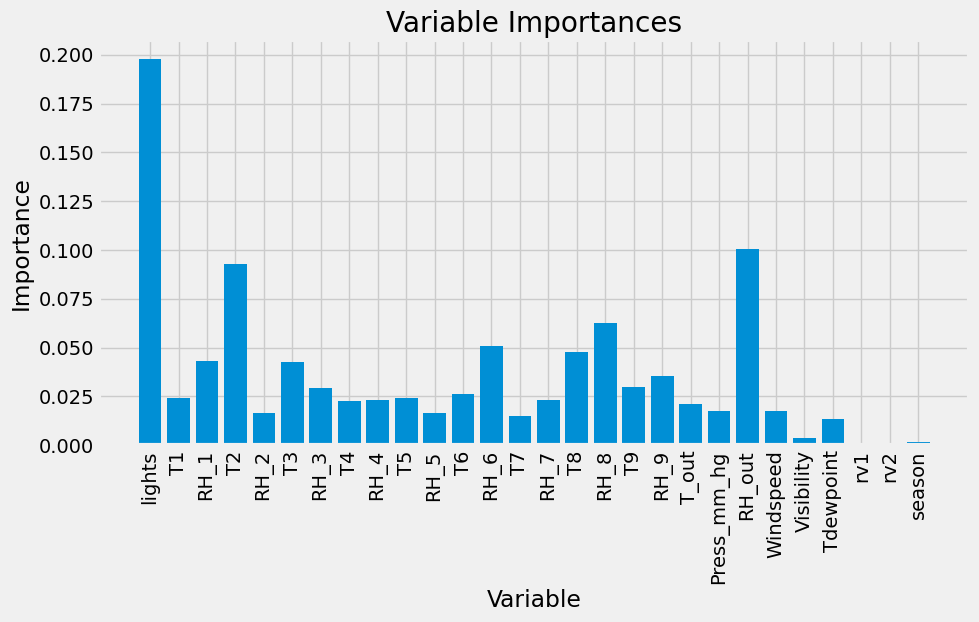

In [ ]:
# Create feature importances plot for random forest
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(10, 5))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

In [ ]:
# GridSearch CV
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object, default 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(-grid_search.best_score_))

# Use the best model from Grid Search for prediction
best_rf_model = grid_search.best_estimator_
y_train_hat_gs = best_rf_model.predict(X_train)
y_test_hat_gs = best_rf_model.predict(X_test)
y_val_hat_gs = best_rf_model.predict(X_val)

# Evaluate the model on the train and test data
mse_train_gs = mean_squared_error(y_train, y_train_hat_gs)
r2_train_gs = r2_score(y_train, y_train_hat_gs)
mse_test_gs = mean_squared_error(y_test, y_test_hat_gs)
r2_test_gs = r2_score(y_test, y_test_hat_gs)
mse_val_gs = mean_squared_error(y_val, y_val_hat_gs)
r2_val_gs = r2_score(y_val, y_val_hat_gs)

print(f"Mean Squared Error (MSE) on train data: {mse_train_gs}")
print(f"R-squared (R2) on train data: {r2_train_gs}")
print(f"Mean Squared Error (MSE) on test data: {mse_test_gs}")
print(f"R-squared (R2) on test data: {r2_test_gs}")
print(f"Mean Squared Error (MSE) on val data: {mse_val_gs}")
print(f"R-squared (R2) on val data: {r2_val_gs}")

# Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
num_trees = 100
dt = DecisionTreeRegressor(max_depth=1)
bt = AdaBoostRegressor(dt, n_estimators=num_trees, learning_rate=0.01)
bt = bt.fit(X_train, y_train)

In [ ]:
# Get feature importances for boosting
feature_importances = bt.feature_importances_

# Sort and plot
indices = np.argsort(feature_importances)[::-1]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), [predictors[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 5))
plot_tree(bt.estimators_[0], filled=True, feature_names=predictors)
plt.show()

In [ ]:
y_train_hat_bt = bt.predict(X_train)
mse_train_bt = mean_squared_error(y_train, y_train_hat_bt)
r2_train_bt = r2_score(y_train, y_train_hat_bt)

y_test_hat_bt = bt.predict(X_test)
mse_test_bt = mean_squared_error(y_test, y_test_hat_bt)
r2_test_bt = r2_score(y_test, y_test_hat_bt)

print(mse_train_bt, r2_train_bt)
print(mse_test_bt, r2_test_bt)

In [ ]:
param_grid = {
  "learning_rate": [0.01, 0.05, 0.1, 1.0, 2.0, 5.0],
  "n_estimators": [10, 50, 100, 200, 500],
  "estimator__max_depth" :[1,2,3]
}
cv_bt = GridSearchCV(bt, param_grid) #default 5 folds
cv_bt.fit(X_train, y_train)

In [ ]:
cv_bt.best_estimator_.learning_rate, cv_bt.best_estimator_.n_estimators, cv_bt.best_estimator_.estimator.max_depth
cv_bt.best_params_

In [ ]:
# Fit boosting to the best estimator from CV
dt = DecisionTreeRegressor(max_depth=3)
bt = AdaBoostRegressor(dt, n_estimators=100, learning_rate=0.01)
bt = bt.fit(X_train, y_train)

y_train_hat_cvbt = bt.predict(X_train)
mse_train_cvbt = mean_squared_error(y_train, y_train_hat_cvbt)
r2_train_cvbt = r2_score(y_train, y_train_hat_cvbt)

y_test_hat_cvbt = bt.predict(X_test)
mse_test_cvbt = mean_squared_error(y_test, y_test_hat_cvbt)
r2_test_cvbt = r2_score(y_test, y_test_hat_cvbt)

y_val_hat_cvbt = bt.predict(X_val)
mse_val_cvbt = mean_squared_error(y_val, y_val_hat_cvbt)
r2_vak_cvbt = r2_score(y_val, y_val_hat_cvbt)

print(mse_train_cvbt, r2_train_cvbt)
print(mse_test_cvbt, r2_test_cvbt)
print(mse_val_cvbt, r2_vak_cvbt)

In [ ]:
# Get feature importances for boosting with max_depth=3
feature_importances = bt.feature_importances_

# Sort and plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), [predictors[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.show()